# Compare highly-rated with low-rated apps

In [1]:
from ATENA_PRO.src.ATENA_A_EDA.benchmark.atena.simulation.dataset import DatasetMeta, SchemaName, \
    Dataset, PlayStoreDatasetName

In [2]:
dataset_meta = DatasetMeta(SchemaName.PLAY_STORE, PlayStoreDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
1,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,2018,4
2,2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,1000000,Free,0.0,Everyone,2018,4
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,10000000,Free,0.0,Everyone,2018,4
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,1000000,Free,0.0,Everyone,2018,4
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,10000,Free,0.0,Everyone,2017,2


### Session Tree:

### Queries

In [5]:
median_rating = dataset_df['rating'].median()
high_rated = dataset_df[dataset_df['rating'] >= median_rating]
low_rated = dataset_df[dataset_df['rating'] < median_rating]
print(median_rating)

4.3


In [8]:
print("Average app size for high-rated apps (in MB):", high_rated['app_size_kb'].mean() / 1024)
print("Average app size for low-rated apps (in MB):", low_rated['app_size_kb'].mean() / 1024)
print("Average number of installs for high-rated apps:", high_rated['installs'].mean())
print("Average number of installs for low-rated apps:", low_rated['installs'].mean())
print("Average price for high-rated apps:", high_rated['price'].mean())
print("Average price for low-rated apps:", low_rated['price'].mean())

Average app size for high-rated apps (in MB): 24.530313916774613
Average app size for low-rated apps (in MB): 19.954070139811837
Average number of installs for high-rated apps: 53405054.774241306
Average number of installs for low-rated apps: 9528200.055959709
Average price for high-rated apps: 0.707675795706875
Average price for low-rated apps: 1.6254085058757624


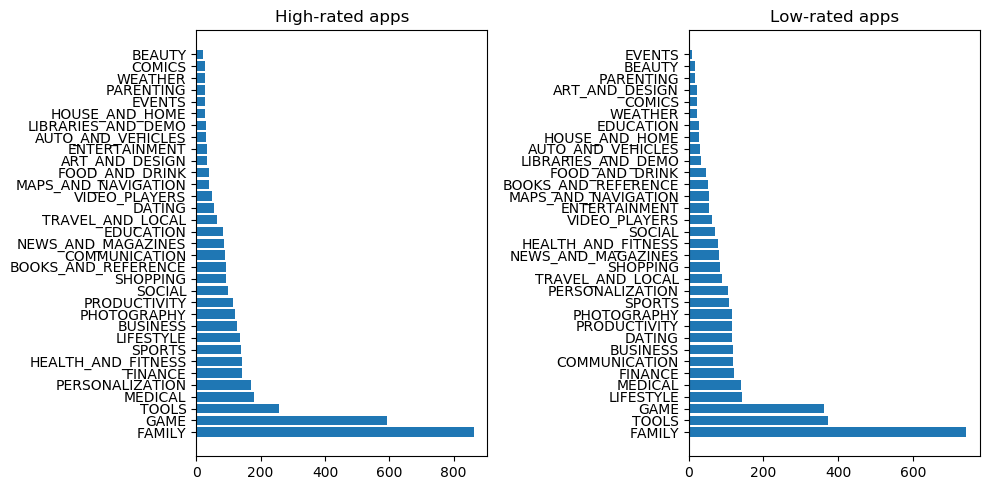

In [9]:
import matplotlib.pyplot as plt

high_rated_categories = high_rated['category'].value_counts()
low_rated_categories = low_rated['category'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].barh(high_rated_categories.index, high_rated_categories.values)
ax[0].set_title('High-rated apps')
ax[1].barh(low_rated_categories.index, low_rated_categories.values)
ax[1].set_title('Low-rated apps')
plt.tight_layout()
plt.show()